In [ ]:
pip install bioscraping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bioscraping: filename=bioscraping-0.0.3-py3-none-any.whl size=14710 sha256=1658d68f22884f7103f324a4fde27d41c5f3861709f7f8465da2fd66daf9af3a
  Stored in directory: /root/.cache/pip/wheels/58/a1/ca/3e0f0ffcdbd0a7139aa06b90be70ffec5bbd6ff5a03904c972
Successfully built bioscraping


In [ ]:
##PubMed
from bioscraping import PubMedClient
import pandas as pd

pubmed = PubMedClient(':memory:')

**get abstract from all PMIDs**

In [ ]:
import urllib.request
import urllib.parse
import requests
from bs4 import BeautifulSoup

base_url = "http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
def dd2(pmid):
    url = PubMedClient.base_url

    params = {
        'id':pmid,
        'retmode':'text',
        'rettype':'abstract',
        'db':'pubmed',
        'api_key':'ec6ae39feb925adc7cdfe8b122c883fdfa09'
        }

    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
    data = urllib.parse.urlencode(params)
    request = urllib.request.Request(base_url, data,headers=hdr)
    full_url = "&".join([base_url, data])
#    response = urllib.request.urlopen(request)
    response = requests.get(full_url)
#    page = response.read(200000).decode("utf-8")
    soup = BeautifulSoup(response.content, 'html.parser')
    #print(soup)
    print('im here for pmid ',pmid)
    return  soup


#for pmid in pmids:
#    dd(pmid)


**Build get_pmid function**

In [ ]:
   
# search-results-chunks- search-results-chunk results-chunk - full-docsum - docsum-wrap - docsum-content - docsum-title 
# full-docsum - docsum-wrap - docsum-content - docsum-citation full-citation - docsum-authors short-authors
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import requests

def get_pmid3(pages_no,term):
    url = PubMedClient.base_url
    pages_num=pages_no
    pmids = []
    params = {
        'id':'pmid',
        'retmode':'text',
        'rettype':'abstract',
        'db':'pubmed'
        }
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}  
    searchKeyWords = term
    for page in range(1, pages_num, 1):  
        base_url = 'https://www.ncbi.nlm.nih.gov/pubmed/?term=' + searchKeyWords +'&page='+ str(page)
        data = urllib.parse.urlencode(params)
        request = urllib.request.Request(base_url, data,headers=hdr)
        full_url = "&".join([base_url, data])
        print(full_url)
        print(page)
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, "lxml")
        for div in soup.find_all("span", {"class": "docsum-pmid"}):
            pmids.append(div.text.strip())
            print(div.text.strip())
    print(pmids)
    return pmids
#get_pmid2(3)

#Data Extraction 

**`Generic data extraction `**

In [ ]:
# use this keyword Arrhythmia for testing

def gen_data_extraction(term,number_of_pages):
    pmids=[]
    #number_of_pages=3
    #term='Arrhythmia'

    pmids=get_pmid3(number_of_pages,term)
    #print(pmids)
    row_list =[]
    for pmid in pmids:
        dict1={'article':dd2(pmid),'term':term}
        print('gen_data_extraction  pmid= ',pmid)
        row_list.append(dict1)
        #print(dict1)
    results2=pd.DataFrame(row_list)
    print(results2.shape)
    return results2


In [ ]:
header_list = ["keyword", "pages"]
Weigted_keywords =  pd.read_csv('/content/Dreams_Keywords.csv',names = header_list)
Weigted_keywords

,keyword,pages
0,dream and physiology,1
1,dream content,1
2,dream extraction,1
3,dream extraction technologies,1
4,why we dream,1
5,dream and memory,1
6,dream type,1
7,lucid dream,1
8,EEG and dream,1
9,fMRI and dream,1


In [ ]:
header_list = ["keyword", "pages"]
Weigted_keywords =  pd.read_csv('/content/Dreams_Keywords.csv',names = header_list)

all_articles=[]

for i in range(len(Weigted_keywords)-1):
    print('Term: ',Weigted_keywords['keyword'][i+1],'number of pages: ',Weigted_keywords['pages'][i+1]+5)
    #all_articles.append(gen_data_extraction(keywords[i],number_of_pages))
    all_articles.append(gen_data_extraction(Weigted_keywords['keyword'][i+1],Weigted_keywords['pages'][i+1]+5))

all_articles = pd.concat(all_articles,ignore_index=True)

Streaming output truncated to the last 5000 lines.
1
19709022
31877076
27829109
32549000
16373746
20284384
29313793
949223
7149971
18386653
https://www.ncbi.nlm.nih.gov/pubmed/?term=day dreaming&page=2&id=pmid&retmode=text&rettype=abstract&db=pubmed
2
14115830
14278734
35312422
983741
27035369
33845629
7382050
5045728
34402760
35028804
https://www.ncbi.nlm.nih.gov/pubmed/?term=day dreaming&page=3&id=pmid&retmode=text&rettype=abstract&db=pubmed
3
2348045
14799654
28321851
4812431
33338866
32880471
29758549
547718
27634516
27859140
https://www.ncbi.nlm.nih.gov/pubmed/?term=day dreaming&page=4&id=pmid&retmode=text&rettype=abstract&db=pubmed
4
35526448
18512366
36116915
11942225
32583866
35679778
29313785
29313782
29313774
27500702
https://www.ncbi.nlm.nih.gov/pubmed/?term=day dreaming&page=5&id=pmid&retmode=text&rettype=abstract&db=pubmed
5
27566886
23852033
917695
33684892
34396899
7133788
2189925
35316165
30486717
27059815
['19709022', '31877076', '27829109', '32549000', '16373746', '20

In [ ]:
all_articles

,article,term
0,[1. Conscious Cogn. 2018 Jul;62:148-162. doi: ...,dream content
1,[1. Trends Cogn Sci. 2010 Feb;14(2):88-100. do...,dream content
2,[1. Lancet Neurol. 2020 Oct;19(10):849-859. do...,dream content
3,[1. Conscious Cogn. 2008 Dec;17(4):1257-65. do...,dream content
4,[1. Conscious Cogn. 2012 Sep;21(3):1456-75. do...,dream content
...,...,...
2629,[1. Science. 1968 Mar 8;159(3819):1070-8. doi:...,sleep disorders and dreams
2630,[1. Semin Neurol. 1987 Sep;7(3):243-9. doi: 10...,sleep disorders and dreams
2631,[1. Sleep. 2016 Jun 1;39(6):1275-82. doi: 10.5...,sleep disorders and dreams
2632,[1. Schweiz Med Wochenschr. 1995 Mar 25;125(12...,sleep disorders and dreams


**Text Preprocessing**

extract paragraphs

In [ ]:
all_articles['article'][0]

1. Conscious Cogn. 2018 Jul;62:148-162. doi: 10.1016/j.concog.2018.03.009. Epub 
2018 May 5.

How bizarre? A pluralist approach to dream content.

Rosen MG(1).

Author information:
(1)Aarhus University, Denmark, Interacting Minds Centre, Jens Chr. Skous Vej 4, 
Building 1483, 3rd Floor, 8000 Aarhus C, Denmark. Electronic address: 
Melanie.rosen@cas.au.dk.

Are dreams bizarre, nonsensical experiences or real-world simulations? I 
introduce a pluralist approach to dream content that highlights the 
philosophical and empirical implications of treating dreaming as a highly varied 
experience that can be anywhere on a spectrum from truly bizarre and incoherent 
to wake-like and mundane. Here I discuss several explanations for why theorists 
disagree on whether dreams should be defined as primarily bizarre or convincing, 
real-world simulations. Rating scales can underestimate or overestimate 
bizarreness depending on the variables of the scale and interpretation of 
contextual factors. Alth

In [ ]:
def find_paragraph(article):
#print(results_infections[0])
    par_list=str(article).split('\n\n')
#par = list(filter(lambda x : x != '', text.split('\n\n')))
    return par_list

find_paragraph(all_articles['article'][0])

['1. Conscious Cogn. 2018 Jul;62:148-162. doi: 10.1016/j.concog.2018.03.009. Epub \n2018 May 5.',
 'How bizarre? A pluralist approach to dream content.',
 'Rosen MG(1).',
 'Author information:\n(1)Aarhus University, Denmark, Interacting Minds Centre, Jens Chr. Skous Vej 4, \nBuilding 1483, 3rd Floor, 8000 Aarhus C, Denmark. Electronic address: \nMelanie.rosen@cas.au.dk.',
 'Are dreams bizarre, nonsensical experiences or real-world simulations? I \nintroduce a pluralist approach to dream content that highlights the \nphilosophical and empirical implications of treating dreaming as a highly varied \nexperience that can be anywhere on a spectrum from truly bizarre and incoherent \nto wake-like and mundane. Here I discuss several explanations for why theorists \ndisagree on whether dreams should be defined as primarily bizarre or convincing, \nreal-world simulations. Rating scales can underestimate or overestimate \nbizarreness depending on the variables of the scale and interpretation of 

find single abstract from single article

In [ ]:
import pandas as pd
import re 

def find_abstract(par_listy):

# create a dataframe containing sentences # this function can be applied to method1 also
    abstract = pd.DataFrame(columns=['Sent','Len'])

    row_list = []
    
    for sent in range(len(par_listy)):
       wordcount = len(par_listy[sent].split())
       #print(myresult['sentence'][sent].split())
       #dict1 = {'Sent':par_listy[sent],'Len':wordcount}
       if (wordcount >= 50) &(re.search('^Author', par_listy[sent])==None)  :
         row_list.append(par_listy[sent])

   #&(re.search('^Author', str)!=None)                
    abstract = row_list
    pd.set_option('display.max_colwidth', None)
    #abstract.head()
    return abstract

In [ ]:
find_abstract(find_paragraph(all_articles['article'][0]))

['Are dreams bizarre, nonsensical experiences or real-world simulations? I \nintroduce a pluralist approach to dream content that highlights the \nphilosophical and empirical implications of treating dreaming as a highly varied \nexperience that can be anywhere on a spectrum from truly bizarre and incoherent \nto wake-like and mundane. Here I discuss several explanations for why theorists \ndisagree on whether dreams should be defined as primarily bizarre or convincing, \nreal-world simulations. Rating scales can underestimate or overestimate \nbizarreness depending on the variables of the scale and interpretation of \ncontextual factors. Although double blind analysis of dream reports is assumed \nto be the most accurate method of quantifying dream bizarreness, contextual \nfactors can only be clarified by the dreamer themselves, since only they can \njudge whether an event would be bizarre in their own lives, however the dreamer \nmight find elements bizarre after waking that they di

**find all abstracts for list of articls for all diseases**

In [ ]:
#find_abstract(find_paragraph(results_infections[0]))
#result = [f(x) for x in results_infections['col']]
all_articles2=[]
for i in range(len(all_articles['article'])):
    all_articles2.append(find_abstract(find_paragraph(all_articles['article'][i])))
all_articles2

[['Are dreams bizarre, nonsensical experiences or real-world simulations? I \nintroduce a pluralist approach to dream content that highlights the \nphilosophical and empirical implications of treating dreaming as a highly varied \nexperience that can be anywhere on a spectrum from truly bizarre and incoherent \nto wake-like and mundane. Here I discuss several explanations for why theorists \ndisagree on whether dreams should be defined as primarily bizarre or convincing, \nreal-world simulations. Rating scales can underestimate or overestimate \nbizarreness depending on the variables of the scale and interpretation of \ncontextual factors. Although double blind analysis of dream reports is assumed \nto be the most accurate method of quantifying dream bizarreness, contextual \nfactors can only be clarified by the dreamer themselves, since only they can \njudge whether an event would be bizarre in their own lives, however the dreamer \nmight find elements bizarre after waking that they d

##Filter

In [ ]:

all_articles['article']=all_articles2

all_articles_filtered = all_articles[all_articles['article'].map(len) !=0 ]
all_articles_filtered.reset_index(drop=True, inplace=True)
all_articles_filtered

,article,term
0,"[Are dreams bizarre, nonsensical experiences or real-world simulations? I \nintroduce a pluralist approach to dream content that highlights the \nphilosophical and empirical implications of treating dreaming as a highly varied \nexperience that can be anywhere on a spectrum from truly bizarre and incoherent \nto wake-like and mundane. Here I discuss several explanations for why theorists \ndisagree on whether dreams should be defined as primarily bizarre or convincing, \nreal-world simulations. Rating scales can underestimate or overestimate \nbizarreness depending on the variables of the scale and interpretation of \ncontextual factors. Although double blind analysis of dream reports is assumed \nto be the most accurate method of quantifying dream bizarreness, contextual \nfactors can only be clarified by the dreamer themselves, since only they can \njudge whether an event would be bizarre in their own lives, however the dreamer \nmight find elements bizarre after waking that they did not find unusual during \nthe dream. Dreams can at times be so bizarre and incoherent that that they are \ndifficult or impossible to report accurately, mundane and indistinguishable from \nwaking life or anything in-between. Both bizarre and mundane dreams should be of \ngreat interest to philosophers of mind and cognitive scientists.]",dream content
1,"[Dreams are a remarkable experiment in psychology and neuroscience, conducted \nevery night in every sleeping person. They show that the human brain, \ndisconnected from the environment, can generate an entire world of conscious \nexperiences by itself. Content analysis and developmental studies have promoted \nunderstanding of dream phenomenology. In parallel, brain lesion studies, \nfunctional imaging and neurophysiology have advanced current knowledge of the \nneural basis of dreaming. It is now possible to start integrating these two \nstrands of research to address fundamental questions that dreams pose for \ncognitive neuroscience: how conscious experiences in sleep relate to underlying \nbrain activity; why the dreamer is largely disconnected from the environment; \nand whether dreaming is more closely related to mental imagery or to perception.]",dream content
2,"[Dreams are experiences that occur during sleep, while we are disconnected from \nthe environment. Thanks to recent progress in neuroimaging techniques, it is now \nbecoming possible to relate dream features to specific patterns of brain \nactivity. Some conditions occurring in patients with neurological disorders, \nsuch as lucid dreams and parasomnias, not only have diagnostic value, but also \noffer a window into the dream process. They show that dreaming is reflected in \nphysiological signals, behaviours, and brain activity patterns, and that the \nbody can enact dream content. Yet, the dream body can also be distinct from the \nreal body; in their dreams, patients with congenital paraplegia can walk, those \nwith sleep apnoea rarely suffocate, and phantom limb pain can disappear. These \nconditions provide valuable models for future studies investigating the \nmechanisms that underlie oneiric experiences.]",dream content
3,"[The similarities and differences in dream content at the cross-cultural, gender, \nand individual levels provide one starting point for carrying out studies that \nattempt to discover correspondences between dream content and various types of \nwaking cognition. Hobson and Kahn's (Hobson, J. A., &amp; Kahn, D. (2007). Dream \ncontent: Individual and generic aspects. Consciousness and Cognition, 16, \n850-858.) conclusion that dream content may be more generic than most \nresearchers realize, and that individual differences are less salient than \nusually thought, provides the occasion for a review of findings based on the \nHall and Van de Castle (Hall, C., &amp; Van de Castle, R. (1966). The content \nanalysis of dreams. New York: Appleton-Century-Crofts.) coding system for the \nstud

In [ ]:
all_articles_filtered = all_articles_filtered.replace('\n','', regex=True)
all_articles_filtered = all_articles_filtered.replace('\n',' ', regex=True)
all_articles_filtered = all_articles_filtered.replace(r'\\n',' ', regex=True)
pd.set_option('display.max_colwidth', None)
all_articles_filtered

,article,term
0,"['Are dreams bizarre, nonsensical experiences or real-world simulations? I introduce a pluralist approach to dream content that highlights the philosophical and empirical implications of treating dreaming as a highly varied experience that can be anywhere on a spectrum from truly bizarre and incoherent to wake-like and mundane. Here I discuss several explanations for why theorists disagree on whether dreams should be defined as primarily bizarre or convincing, real-world simulations. Rating scales can underestimate or overestimate bizarreness depending on the variables of the scale and interpretation of contextual factors. Although double blind analysis of dream reports is assumed to be the most accurate method of quantifying dream bizarreness, contextual factors can only be clarified by the dreamer themselves, since only they can judge whether an event would be bizarre in their own lives, however the dreamer might find elements bizarre after waking that they did not find unusual during the dream. Dreams can at times be so bizarre and incoherent that that they are difficult or impossible to report accurately, mundane and indistinguishable from waking life or anything in-between. Both bizarre and mundane dreams should be of great interest to philosophers of mind and cognitive scientists.']",dream content
1,"['Dreams are a remarkable experiment in psychology and neuroscience, conducted every night in every sleeping person. They show that the human brain, disconnected from the environment, can generate an entire world of conscious experiences by itself. Content analysis and developmental studies have promoted understanding of dream phenomenology. In parallel, brain lesion studies, functional imaging and neurophysiology have advanced current knowledge of the neural basis of dreaming. It is now possible to start integrating these two strands of research to address fundamental questions that dreams pose for cognitive neuroscience: how conscious experiences in sleep relate to underlying brain activity; why the dreamer is largely disconnected from the environment; and whether dreaming is more closely related to mental imagery or to perception.']",dream content
2,"['Dreams are experiences that occur during sleep, while we are disconnected from the environment. Thanks to recent progress in neuroimaging techniques, it is now becoming possible to relate dream features to specific patterns of brain activity. Some conditions occurring in patients with neurological disorders, such as lucid dreams and parasomnias, not only have diagnostic value, but also offer a window into the dream process. They show that dreaming is reflected in physiological signals, behaviours, and brain activity patterns, and that the body can enact dream content. Yet, the dream body can also be distinct from the real body; in their dreams, patients with congenital paraplegia can walk, those with sleep apnoea rarely suffocate, and phantom limb pain can disappear. These conditions provide valuable models for future studies investigating the mechanisms that underlie oneiric experiences.']",dream content
3,"[""The similarities and differences in dream content at the cross-cultural, gender, and individual levels provide one starting point for carrying out studies that attempt to discover correspondences between dream content and various types of waking cognition. Hobson and Kahn's (Hobson, J. A., &amp; Kahn, D. (2007). Dream content: Individual and generic aspects. Consciousness and Cognition, 16, 850-858.) conclusion that dream content may be more generic than most researchers realize, and that individual differences are less salient than usually thought, provides the occasion for a review of findings based on the Hall and Van de Castle (Hall, C., &amp; Van de Castle, R. (1966). The content analysis of dreams. New York: Appleton-Century-Crofts.) coding system for the study of dream content. Then new findings based on a computationally intensive randomizati

In [ ]:
import string 

#emoji 
all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(r'[\[\]]', '')
#emoji 
all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(r'"', '')
#emoji 
all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(r'\'', '')
#emoji 
all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(u'\xa0', u' ', regex=True)


pd.set_option('display.max_colwidth', None)
all_articles_filtered

<ipython-input-92-2594ef520343>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(r'[\[\]]', '')
<ipython-input-92-2594ef520343>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  all_articles_filtered['article'] = all_articles_filtered['article'].str.replace(r'\'', '')


,article,term
0,"Are dreams bizarre, nonsensical experiences or real-world simulations? I introduce a pluralist approach to dream content that highlights the philosophical and empirical implications of treating dreaming as a highly varied experience that can be anywhere on a spectrum from truly bizarre and incoherent to wake-like and mundane. Here I discuss several explanations for why theorists disagree on whether dreams should be defined as primarily bizarre or convincing, real-world simulations. Rating scales can underestimate or overestimate bizarreness depending on the variables of the scale and interpretation of contextual factors. Although double blind analysis of dream reports is assumed to be the most accurate method of quantifying dream bizarreness, contextual factors can only be clarified by the dreamer themselves, since only they can judge whether an event would be bizarre in their own lives, however the dreamer might find elements bizarre after waking that they did not find unusual during the dream. Dreams can at times be so bizarre and incoherent that that they are difficult or impossible to report accurately, mundane and indistinguishable from waking life or anything in-between. Both bizarre and mundane dreams should be of great interest to philosophers of mind and cognitive scientists.",dream content
1,"Dreams are a remarkable experiment in psychology and neuroscience, conducted every night in every sleeping person. They show that the human brain, disconnected from the environment, can generate an entire world of conscious experiences by itself. Content analysis and developmental studies have promoted understanding of dream phenomenology. In parallel, brain lesion studies, functional imaging and neurophysiology have advanced current knowledge of the neural basis of dreaming. It is now possible to start integrating these two strands of research to address fundamental questions that dreams pose for cognitive neuroscience: how conscious experiences in sleep relate to underlying brain activity; why the dreamer is largely disconnected from the environment; and whether dreaming is more closely related to mental imagery or to perception.",dream content
2,"Dreams are experiences that occur during sleep, while we are disconnected from the environment. Thanks to recent progress in neuroimaging techniques, it is now becoming possible to relate dream features to specific patterns of brain activity. Some conditions occurring in patients with neurological disorders, such as lucid dreams and parasomnias, not only have diagnostic value, but also offer a window into the dream process. They show that dreaming is reflected in physiological signals, behaviours, and brain activity patterns, and that the body can enact dream content. Yet, the dream body can also be distinct from the real body; in their dreams, patients with congenital paraplegia can walk, those with sleep apnoea rarely suffocate, and phantom limb pain can disappear. These conditions provide valuable models for future studies investigating the mechanisms that underlie oneiric experiences.",dream content
3,"The similarities and differences in dream content at the cross-cultural, gender, and individual levels provide one starting point for carrying out studies that attempt to discover correspondences between dream content and various types of waking cognition. Hobson and Kahns (Hobson, J. A., &amp; Kahn, D. (2007). Dream content: Individual and generic aspects. Consciousness and Cognition, 16, 850-858.) conclusion that dream content may be more generic than most researchers realize, and that individual differences are less salient than usually thought, provides the occasion for a review of findings based on the Hall and Van de Castle (Hall, C., &amp; Van de Castle, R. (1966). The content analysis of dreams. New York: Appleton-Century-Crofts.) coding system for the study of dream content. Then new findings based on a computationally intensive randomization strategy are 

In [ ]:
pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 30.7 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=05bf6cf550e6a5f955328423a654bc79391d9cbdc5e2c0cc440428cc7493efb0
  Stored in directory: /root/.cache/pip/wheels/c5/01/a4/0160c55074707b535a6757a541842817d530d8080ca943a107
Successfully built langid


In [ ]:
all_articles_filtered['lang']= all_articles_filtered['article']

In [ ]:
import langid

for i in range(len(all_articles_filtered['article'])):
        #print(all_articles_filtered['article'][i])
        print(langid.classify(all_articles_filtered['article'][i])[0])
        all_articles_filtered['lang'][i]= langid.classify(all_articles_filtered['article'][i])[0]

en
en
en
en
en
en
en
en
en
es
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
es
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
fr
en
en
en
en
e

In [ ]:
 pd.set_option('display.max_colwidth', None)
 all_articles_filtered[all_articles_filtered.lang != 'en'].count()


article    41
term       41
lang       41
dtype: int64

In [ ]:
all_articles_filtered = all_articles_filtered[all_articles_filtered.lang == 'en']

In [ ]:
all_articles_filtered

,article,term,lang
0,"Are dreams bizarre, nonsensical experiences or real-world simulations? I introduce a pluralist approach to dream content that highlights the philosophical and empirical implications of treating dreaming as a highly varied experience that can be anywhere on a spectrum from truly bizarre and incoherent to wake-like and mundane. Here I discuss several explanations for why theorists disagree on whether dreams should be defined as primarily bizarre or convincing, real-world simulations. Rating scales can underestimate or overestimate bizarreness depending on the variables of the scale and interpretation of contextual factors. Although double blind analysis of dream reports is assumed to be the most accurate method of quantifying dream bizarreness, contextual factors can only be clarified by the dreamer themselves, since only they can judge whether an event would be bizarre in their own lives, however the dreamer might find elements bizarre after waking that they did not find unusual during the dream. Dreams can at times be so bizarre and incoherent that that they are difficult or impossible to report accurately, mundane and indistinguishable from waking life or anything in-between. Both bizarre and mundane dreams should be of great interest to philosophers of mind and cognitive scientists.",dream content,en
1,"Dreams are a remarkable experiment in psychology and neuroscience, conducted every night in every sleeping person. They show that the human brain, disconnected from the environment, can generate an entire world of conscious experiences by itself. Content analysis and developmental studies have promoted understanding of dream phenomenology. In parallel, brain lesion studies, functional imaging and neurophysiology have advanced current knowledge of the neural basis of dreaming. It is now possible to start integrating these two strands of research to address fundamental questions that dreams pose for cognitive neuroscience: how conscious experiences in sleep relate to underlying brain activity; why the dreamer is largely disconnected from the environment; and whether dreaming is more closely related to mental imagery or to perception.",dream content,en
2,"Dreams are experiences that occur during sleep, while we are disconnected from the environment. Thanks to recent progress in neuroimaging techniques, it is now becoming possible to relate dream features to specific patterns of brain activity. Some conditions occurring in patients with neurological disorders, such as lucid dreams and parasomnias, not only have diagnostic value, but also offer a window into the dream process. They show that dreaming is reflected in physiological signals, behaviours, and brain activity patterns, and that the body can enact dream content. Yet, the dream body can also be distinct from the real body; in their dreams, patients with congenital paraplegia can walk, those with sleep apnoea rarely suffocate, and phantom limb pain can disappear. These conditions provide valuable models for future studies investigating the mechanisms that underlie oneiric experiences.",dream content,en
3,"The similarities and differences in dream content at the cross-cultural, gender, and individual levels provide one starting point for carrying out studies that attempt to discover correspondences between dream content and various types of waking cognition. Hobson and Kahns (Hobson, J. A., &amp; Kahn, D. (2007). Dream content: Individual and generic aspects. Consciousness and Cognition, 16, 850-858.) conclusion that dream content may be more generic than most researchers realize, and that individual differences are less salient than usually thought, provides the occasion for a review of findings based on the Hall and Van de Castle (Hall, C., &amp; Van de Castle, R. (1966). The content analysis of dreams. New York: Appleton-Century-Crofts.) coding system for the study of dream content. Then new findings based on a computationally intensive randomization

In [ ]:
all_articles_filtered.reset_index(drop=True,inplace=True)

In [ ]:
all_articles_filtered['article'].head(10)

0    Are dreams bizarre, nonsensical experiences or...
1    Dreams are a remarkable experiment in psycholo...
2    Dreams are experiences that occur during sleep...
3    The similarities and differences in dream cont...
4    In lucid dreams the dreamer is aware of dreami...
5    Individuals differ greatly in their dream reca...
6    A number of behavioral, social, biological, an...
7    Although central to any exhaustive theory of h...
8    STUDY OBJECTIVES: Few studies have addressed d...
9    Consciousness never fades during waking. Howev...
Name: article, dtype: object

## Words frequency bar plot

In [ ]:
# Groupby by country
term = df.groupby("term")

# Summary statistic of all countries
term.describe().head()

sent                                               \
                       count       mean        std  min   25%   50%   75%   
term                                                                        
Dreams and brain scans  48.0   9.770833   4.121762  4.0  7.00   9.5  12.0   
Dreams and gender       47.0  11.531915   5.766662  5.0  8.50  11.0  13.0   
EEG and dream           44.0   8.681818   3.594393  3.0  6.75   8.0  11.0   
Frued and dream         23.0  16.608696  12.470836  3.0  8.00  12.0  23.5   
RAS and dream           27.0  11.444444   5.279374  4.0  9.00  10.0  12.5   

                              
                         max  
term                          
Dreams and brain scans  23.0  
Dreams and gender       38.0  
EEG and dream           20.0  
Frued and dream         47.0  
RAS and dream           28.0

In [ ]:
df['term'].value_counts()

dream and REM sleep                50
dreams studies                     50
fMRI and dream                     50
dream and non-REM sleep            49
dreams and cognitive psychology    49
brainstem and dream                49
dream and age                      49
females dreams                     48
dreams content analysis            48
dreams and sleep                   48
dreams and conscious mind          48
dream and NREM sleep               48
Dreams and brain scans             48
brain and dream                    48
dream and brain activity           48
dreams and memory consolidation    48
dream and cerebral cortex          48
long term memory and dream         48
sleep stages and dream             48
dreams and psychology              47
dream extraction                   47
dream and hippocampus              47
males dreams                       47
dreams articles                    47
Dreams and gender                  47
dreams and neuroscience            47
dream reason

In [ ]:
term.count().sort_values(by="sent",ascending=False).head()

,article,lang,summ,sent,keywords
term,,,,,
fMRI and dream,50,50,48,50,50
dreams studies,50,50,49,50,50
dream and REM sleep,50,50,46,50,50
brainstem and dream,49,49,47,49,49
dreams and cognitive psychology,49,49,48,49,49


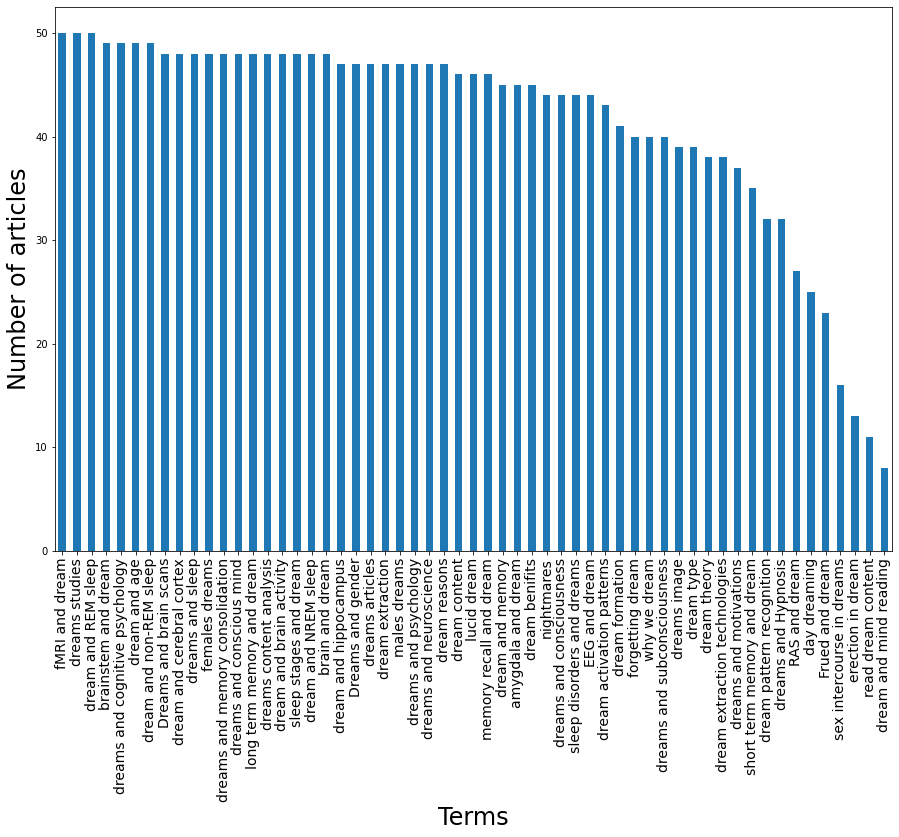

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(15,10))
term.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("Terms", fontsize=24)
plt.ylabel("Number of articles", fontsize=24)
plt.show()